In [1]:
import re
def read_text(file):
    with open(f"data/{file}",'r') as f:
        line = f.readlines()
    cor_lines = []
    for l in line:
        if l.startswith('o'):
            l = l.lstrip("o")
        cor_lines.append(re.sub("[^A-Za-z0-9&]"," ",l).strip())

    cor_lines = [i for i in cor_lines if i != '']

    cor_lines = [re.sub(" +"," ", i) for i in cor_lines]
    return cor_lines

In [2]:
from transformers import pipeline

In [3]:
summarizer = pipeline("summarization", truncation=True)
sentiment = pipeline("sentiment-analysis", truncation=True, padding= "max_length")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [4]:
var = read_text("doc2.txt")

In [5]:
# txt = ". ".join(var[:25])

In [6]:
sents = sentiment(var)

In [7]:
indices = [j for j,x in enumerate(sents) if ((x['label'] == "NEGATIVE")&(x['score']>0.95))]

In [8]:
var_ = [var[i] for i in indices]

In [9]:
var_

['If we re looking to improve efficiency then in my opinion we should look to apply lean philosophies and utilize black belts etc on this project',
 'Perhaps we should pick an example at SHTC and track it in detail to view where the waste is',
 'There is a basic Activity Diagram in the PWA Development Procedure',
 'Can this be used as a basis to review if the associated process can be leaner or more concurrent',
 'Activities can already be tracked using the ePMT tool',
 'https epmt dm slb com',
 'https wiki slb com display EPMT End User Manual',
 'I ve never seen a project plan relative to the development of PWA in my 18 months at SHTC',
 'We don t truly develop PWA s with and utilizing the experience of our suppliers',
 'We use local suppliers and in house expertise for EXP s then start move onto approved suppliers with ENP s or for PWA s in manufacturing who come back with issues related to their capabilities',
 'Even STI confirmed prototyping isn t their business',
 'We need to enco

In [11]:
len(var_)

50

In [14]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
from heapq import nlargest

In [15]:
################################################################################################################################
def textSummarizer(text, percentage):
    
    # load the model into spaCy
    nlp = spacy.load('en_core_web_sm')
    
    # pass the text into the nlp function
    doc= nlp(text)
    
    ## The score of each word is kept in a frequency table
    tokens=[token.text for token in doc]
    freq_of_word=dict()
    
    # Text cleaning and vectorization 
    for word in doc:
        if word.text.lower() not in list(STOP_WORDS):
            if word.text.lower() not in punctuation:
                if word.text not in freq_of_word.keys():
                    freq_of_word[word.text] = 1
                else:
                    freq_of_word[word.text] += 1
                    
    # Maximum frequency of word
    max_freq=max(freq_of_word.values())
    
    # Normalization of word frequency
    for word in freq_of_word.keys():
        freq_of_word[word]=freq_of_word[word]/max_freq
        
    # In this part, each sentence is weighed based on how often it contains the token.
    sent_tokens= [sent for sent in doc.sents]
    sent_scores = dict()
    for sent in sent_tokens:
        for word in sent:
            if word.text.lower() in freq_of_word.keys():
                if sent not in sent_scores.keys():                            
                    sent_scores[sent]=freq_of_word[word.text.lower()]
                else:
                    sent_scores[sent]+=freq_of_word[word.text.lower()]
    
    
    len_tokens=int(len(sent_tokens)*percentage)
    
    # Summary for the sentences with maximum score. Here, each sentence in the list is of spacy.span type
    summary = nlargest(n = len_tokens, iterable = sent_scores,key=sent_scores.get)
    
    # Prepare for final summary
    final_summary=[word.text for word in summary]
    
    #convert to a string
    summary=" ".join(final_summary)
    
    # Return final summary
    return summary

In [21]:
extractive_summ_sets = textSummarizer(". ".join(var_),0.4)

In [22]:
summarizer(extractive_summ_sets)

[{'summary_text': ' At the beginning of the project eDFT must be clear on what test resources we have currently and what additional test equipment or custom hardware could be required . We use local suppliers and in house expertise for EXP s then move onto approved suppliers with ENP s or for PWA s in manufacturing who come back with issues related to their capabilities .'}]

In [23]:
summarizer(". ".join(var_))

[{'summary_text': " SHTC has never seen a project plan relative to the development of PWA in my 18 months at SHTC . We don't truly develop PWA s with and utilizing the experience of our suppliers . We need to encourage a change in mindset when we receive DFM Reports Engineering Queries Snag Lists from suppliers ."}]

In [12]:
summarizer(". ".join(var_[0:30]))

[{'summary_text': " SHTC has never seen a project plan relative to the development of PWA in my 18 months at SHTC . We don't truly develop PWA s with and utilizing the experience of our suppliers . We need to encourage a change in mindset when we receive Engineering Queries Snag Lists from suppliers . Even STI confirmed prototyping isn't their business ."}]

In [13]:
summarizer(". ".join(var_[30:]))

[{'summary_text': ' Many non value added activities from the engineering point of view i e less time to spend on electronics development. Poor roll out of new business systems SAP KPO time sinks to master them fixes delegated to engineers i e submit an ESM ticket let engineers do the engineering work instead. A lot of duplicate efforts for the same components among various projects. Unfairified objectives for QUEST reporting. colleagues abusing TEAMS too many interruptions with low priority inquiries .'}]

In [20]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in var_:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

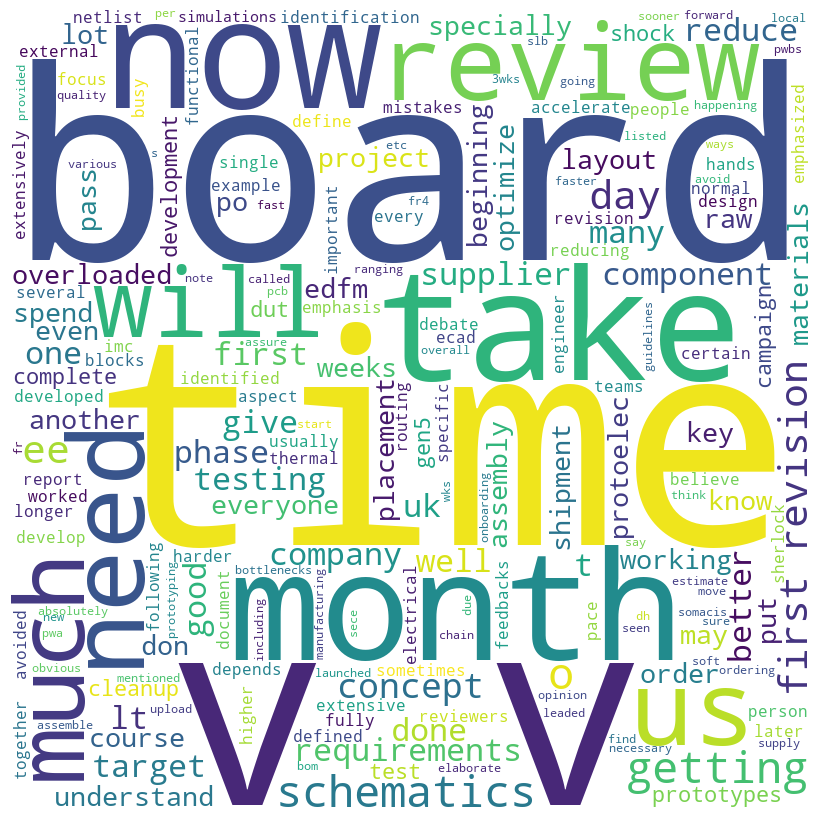

In [23]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [27]:
import spacy
import pytextrank

In [31]:
nlp = spacy.load("en_core_web_sm")
# add PyTextRank to the spaCy pipeline
nlp.add_pipe("textrank")
doc = nlp(". ".join(var_))
# examine the top-ranked phrases in the document
for phrase in doc._.phrases[30:40]:
    print(phrase.text)

raw materials
UK
shipment
shipments
SLB guidelines
the first revision
the development time
course
the same time
a negative time


In [32]:
from keybert import KeyBERT

In [33]:
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(". ".join(var_))
print(keywords)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

[('revision', 0.3422), ('revisions', 0.3399), ('review', 0.3366), ('schematics', 0.3073), ('reviewers', 0.3052)]


In [35]:
import yake
kw_extractor = yake.KeywordExtractor()
keywords = kw_extractor.extract_keywords(". ".join(var_))
for kw in keywords:
    print(kw)

('time', 0.02981663429896941)
('schematics review specially', 0.03452490725363878)
('focus on reducing', 0.0425316878339314)
('fully developed', 0.0425316878339314)
('higher pace', 0.0425316878339314)
('review', 0.04921336969495486)
('concept identification report', 0.061571666290021414)
('months', 0.06464226444746016)
('review specially', 0.0652494851320929)
('boards', 0.06577672716585703)
('revision', 0.07978986881757391)
('board', 0.08222090895732129)
('schematics', 0.08746157969289851)
('requirements specially', 0.09104521597213923)
('concept', 0.0963824927525145)
('concept identification', 0.09911654129091753)
('debate concepts', 0.09911654129091753)
('requirements', 0.11174303870918012)
('schematics review', 0.1205824939697249)
('concept is identified', 0.12206710535654033)
